In [20]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.optim import Adam
import matplotlib.pyplot as plt

import gym
import random
import numpy as np

env = gym.make("CartPole-v0")

In [21]:
class Net(nn.Module):
  
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(5, 64)
        #self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 16)
        #self.bn2 = nn.BatchNorm1d(16)
        self.fc3 = nn.Linear(16, 4)
        
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


In [22]:
loss_fn = torch.nn.MSELoss(reduction="sum")
η = 1e-3
model = Net()
opt = Adam(model.parameters(), lr = η)
    

In [36]:
l = []
replay_array = []

for epoch in range(1000): 
    
    curr = env.reset()
    curr = torch.from_numpy(curr).float()
    for i in range(200):

        # Generate a random step 
        st = random.randint(0,1)
        nex, rew, done, info = env.step(st)
        nex = torch.from_numpy(nex).float()
        replay_array.append((curr, st, nex, rew, done))
        if done:
            break

        # Create input for our network and generate prediction
#         input = torch.from_numpy(np.append(curr,st)).float()
#         nex_pred = model(input)

#         # Calculate loss
#         loss = loss_fn(nex_pred, nex)

#         # Backprop
#         opt.zero_grad()
#         loss.backward()
#         opt.step()
        
        curr = nex
        
#     l.append(loss.item())
    
#     epoch % 1000 == 0 and print("Epoch %d done" % epoch)
    
#plt.plot(l)

In [35]:
replay_array_temp = np.array(replay_array)

ValueError: only one element tensors can be converted to Python scalars

C:\Users\abhis\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


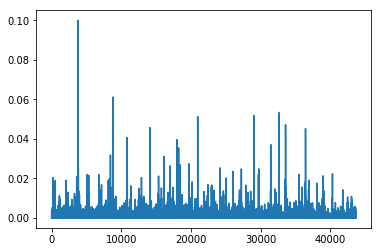

In [37]:
l = []
replay_size = len(replay_array)
for epoch in range(2*replay_size): 
    i = random.randint(0, replay_size-1)
    curr = replay_array[i][0]
    st = replay_array[i][1]
    nex = replay_array[i][2]
    # Create input for our network and generate prediction
    input = torch.from_numpy(np.append(curr,st)).float()
    nex_pred = model(input)

    # Calculate loss
    loss = loss_fn(nex_pred, nex)

    # Backprop
    opt.zero_grad()
    loss.backward()
    opt.step()

    curr = nex

    l.append(loss.item())
    
    #epoch % 1000== 0 and print("Epoch %d done" % epoch)
    
plt.plot(l)

In [33]:
l[-1]

0.00118953175842762

In [ ]:
t = []
for epoch in range(500): 
    
    curr = env.reset()
    for i in range(200):

        # Generate a random step 
        st = random.randint(0,1)

        # Get simulated result from the environment
        nex, rew, done, info = env.step(st)
        nex = torch.from_numpy(nex).float()
        
        # Check if done and then break
        if done:
            break

        # Create input for our network and generate prediction
        input = torch.from_numpy(np.append(curr,st)).float()
        nex_pred = model(input)

        # Calculate loss
        loss = loss_fn(nex_pred, nex) 
        
        if i %100 == 0:
            print("nex = ", nex)
            print("nex_pred = ", nex_pred)
            print("loss = ", loss.item())


        # Backprop
        # opt.zero_grad()
        # loss.backward()
        # opt.step()
        
        curr = nex
        
    t.append(loss.item())
    
    # epoch % 1000 == 0 and print("Epoch %d done" % epoch)
    
plt.plot(t)

C:\Users\abhis\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


nex =  tensor([ 0.0102,  0.2202,  0.0297, -0.2402])
nex_pred =  tensor([ 0.0080,  0.2193,  0.0226, -0.2332], grad_fn=<ThAddBackward>)
loss =  0.00010612431651679799
nex =  tensor([-0.0208, -0.1583, -0.0390,  0.2653])
nex_pred =  tensor([-0.0114, -0.1668, -0.0219,  0.2661], grad_fn=<ThAddBackward>)
loss =  0.00045045497245155275
nex =  tensor([ 0.0329,  0.1894,  0.0230, -0.2361])
nex_pred =  tensor([ 0.0267,  0.1886,  0.0097, -0.2274], grad_fn=<ThAddBackward>)
loss =  0.0002911727933678776
nex =  tensor([ 0.0379,  0.1977,  0.0332, -0.2928])
nex_pred =  tensor([ 0.0273,  0.1974,  0.0125, -0.2823], grad_fn=<ThAddBackward>)
loss =  0.0006513827829621732
nex =  tensor([-0.0307,  0.2075,  0.0356, -0.2670])
nex_pred =  tensor([-0.0296,  0.2067,  0.0327, -0.2607], grad_fn=<ThAddBackward>)
loss =  5.026323196943849e-05
nex =  tensor([-0.0477, -0.2423, -0.0247,  0.3343])
nex_pred =  tensor([-0.0402, -0.2517, -0.0092,  0.3374], grad_fn=<ThAddBackward>)
loss =  0.0003934009582735598
nex =  tensor(

nex =  tensor([-0.0299, -0.2218, -0.0466,  0.3219])
nex_pred =  tensor([-0.0205, -0.2314, -0.0272,  0.3231], grad_fn=<ThAddBackward>)
loss =  0.0005592486704699695
nex =  tensor([-0.0217,  0.2438, -0.0364, -0.2740])
nex_pred =  tensor([-0.0091,  0.2398, -0.0188, -0.2751], grad_fn=<ThAddBackward>)
loss =  0.0004857191815972328
nex =  tensor([ 0.0393,  0.1841,  0.0017, -0.2652])
nex_pred =  tensor([ 0.0343,  0.1830, -0.0099, -0.2574], grad_fn=<ThAddBackward>)
loss =  0.0002217357832705602
nex =  tensor([-0.0417,  0.1925, -0.0337, -0.3262])
nex_pred =  tensor([-0.0324,  0.1885, -0.0221, -0.3249], grad_fn=<ThAddBackward>)
loss =  0.00023885100381448865
nex =  tensor([-0.0216, -0.1507,  0.0345,  0.3180])
nex_pred =  tensor([-0.0184, -0.1573,  0.0357,  0.3238], grad_fn=<ThAddBackward>)
loss =  8.832026651361957e-05
nex =  tensor([-0.0076, -0.1902,  0.0481,  0.3389])
nex_pred =  tensor([-0.0092, -0.1943,  0.0403,  0.3479], grad_fn=<ThAddBackward>)
loss =  0.00016093887097667903
nex =  tensor(

nex =  tensor([-0.0336, -0.1505,  0.0268,  0.2725])
nex_pred =  tensor([-0.0299, -0.1568,  0.0292,  0.2787], grad_fn=<ThAddBackward>)
loss =  9.85495062195696e-05
nex =  tensor([-0.0199, -0.1668, -0.0232,  0.3161])
nex_pred =  tensor([-0.0109, -0.1757, -0.0077,  0.3170], grad_fn=<ThAddBackward>)
loss =  0.0004015479644294828
nex =  tensor([ 0.0397,  0.2112,  0.0433, -0.2598])
nex_pred =  tensor([ 0.0289,  0.2109,  0.0232, -0.2493], grad_fn=<ThAddBackward>)
loss =  0.0006304265698418021
nex =  tensor([ 0.0118, -0.2166, -0.0047,  0.2916])
nex_pred =  tensor([ 0.0117, -0.2204, -0.0072,  0.2991], grad_fn=<ThAddBackward>)
loss =  7.644655124749988e-05
nex =  tensor([ 0.0083,  0.2274, -0.0311, -0.2832])
nex_pred =  tensor([ 0.0150,  0.2249, -0.0239, -0.2812], grad_fn=<ThAddBackward>)
loss =  0.00010685599409043789
nex =  tensor([-0.0088,  0.1515, -0.0031, -0.3434])
nex_pred =  tensor([-0.0102,  0.1502, -0.0120, -0.3362], grad_fn=<ThAddBackward>)
loss =  0.00013414816930890083
nex =  tensor([

nex =  tensor([-0.0105,  0.1666,  0.0084, -0.2949])
nex_pred =  tensor([-0.0110,  0.1654,  0.0021, -0.2878], grad_fn=<ThAddBackward>)
loss =  9.230920841218904e-05
nex =  tensor([-0.0459,  0.2278, -0.0075, -0.3178])
nex_pred =  tensor([-0.0376,  0.2251,  0.0025, -0.3160], grad_fn=<ThAddBackward>)
loss =  0.00017765683878678828
nex =  tensor([ 0.0037, -0.1670, -0.0307,  0.2819])
nex_pred =  tensor([ 0.0101, -0.1736, -0.0203,  0.2846], grad_fn=<ThAddBackward>)
loss =  0.00020038429647684097
nex =  tensor([-0.0196,  0.1516,  0.0264, -0.2893])
nex_pred =  tensor([-0.0219,  0.1510,  0.0160, -0.2807], grad_fn=<ThAddBackward>)
loss =  0.00018740441009867936
nex =  tensor([ 0.0123, -0.2288, -0.0250,  0.2876])
nex_pred =  tensor([ 0.0139, -0.2331, -0.0231,  0.2941], grad_fn=<ThAddBackward>)
loss =  6.655140896327794e-05
nex =  tensor([-0.0305, -0.1738,  0.0257,  0.3494])
nex_pred =  tensor([-0.0254, -0.1817,  0.0313,  0.3539], grad_fn=<ThAddBackward>)
loss =  0.00013886821398045868
nex =  tenso

nex =  tensor([-0.0178, -0.1472, -0.0016,  0.3252])
nex_pred =  tensor([-0.0099, -0.1557,  0.0098,  0.3269], grad_fn=<ThAddBackward>)
loss =  0.00026766443625092506
nex =  tensor([ 0.0261,  0.1678, -0.0315, -0.3372])
nex_pred =  tensor([ 0.0252,  0.1660, -0.0381, -0.3316], grad_fn=<ThAddBackward>)
loss =  7.930467108963057e-05
nex =  tensor([ 0.0199, -0.1577, -0.0436,  0.2757])
nex_pred =  tensor([ 0.0265, -0.1641, -0.0322,  0.2777], grad_fn=<ThAddBackward>)
loss =  0.000216559914406389
nex =  tensor([-0.0371, -0.1586,  0.0318,  0.3453])
nex_pred =  tensor([-0.0314, -0.1670,  0.0382,  0.3495], grad_fn=<ThAddBackward>)
loss =  0.00016137174679897726
nex =  tensor([-0.0115, -0.2259, -0.0199,  0.2709])
nex_pred =  tensor([-0.0087, -0.2309, -0.0158,  0.2772], grad_fn=<ThAddBackward>)
loss =  9.020443394547328e-05
nex =  tensor([-0.0240, -0.2039, -0.0409,  0.2719])
nex_pred =  tensor([-0.0166, -0.2117, -0.0264,  0.2747], grad_fn=<ThAddBackward>)
loss =  0.0003338708193041384
nex =  tensor([

nex =  tensor([ 0.0479,  0.1731, -0.0215, -0.2731])
nex_pred =  tensor([ 0.0446,  0.1717, -0.0303, -0.2666], grad_fn=<ThAddBackward>)
loss =  0.0001335037813987583
nex =  tensor([-0.0440, -0.1658, -0.0109,  0.2564])
nex_pred =  tensor([-0.0366, -0.1739,  0.0012,  0.2596], grad_fn=<ThAddBackward>)
loss =  0.0002775111934170127
nex =  tensor([-0.0314,  0.1913,  0.0078, -0.2998])
nex_pred =  tensor([-0.0282,  0.1897,  0.0082, -0.2947], grad_fn=<ThAddBackward>)
loss =  3.976367588620633e-05
nex =  tensor([ 0.0248, -0.1839, -0.0468,  0.2733])
nex_pred =  tensor([ 0.0297, -0.1895, -0.0380,  0.2766], grad_fn=<ThAddBackward>)
loss =  0.00014394069148693234
nex =  tensor([-0.0332, -0.1838,  0.0238,  0.2811])
nex_pred =  tensor([-0.0307, -0.1893,  0.0244,  0.2885], grad_fn=<ThAddBackward>)
loss =  9.210109419655055e-05
nex =  tensor([-0.0156, -0.1818,  0.0333,  0.3338])
nex_pred =  tensor([-0.0141, -0.1874,  0.0318,  0.3408], grad_fn=<ThAddBackward>)
loss =  8.458959200652316e-05
nex =  tensor([

nex =  tensor([-0.0196, -0.2162, -0.0118,  0.3142])
nex_pred =  tensor([-0.0149, -0.2230, -0.0044,  0.3191], grad_fn=<ThAddBackward>)
loss =  0.00014632650709245354
nex =  tensor([ 0.0247, -0.2191, -0.0043,  0.3293])
nex_pred =  tensor([ 0.0243, -0.2232, -0.0070,  0.3363], grad_fn=<ThAddBackward>)
loss =  7.214889046736062e-05
nex =  tensor([-0.0181, -0.2063,  0.0207,  0.3211])
nex_pred =  tensor([-0.0165, -0.2115,  0.0200,  0.3284], grad_fn=<ThAddBackward>)
loss =  8.367848204215989e-05
nex =  tensor([ 0.0138,  0.2288, -0.0481, -0.3007])
nex_pred =  tensor([ 0.0219,  0.2259, -0.0386, -0.2997], grad_fn=<ThAddBackward>)
loss =  0.0001642745774006471
nex =  tensor([-0.0469,  0.2397,  0.0427, -0.2937])
nex_pred =  tensor([-0.0442,  0.2393,  0.0428, -0.2885], grad_fn=<ThAddBackward>)
loss =  3.4453805710654706e-05
nex =  tensor([ 0.0086, -0.2339, -0.0401,  0.2788])
nex_pred =  tensor([ 0.0118, -0.2389, -0.0341,  0.2844], grad_fn=<ThAddBackward>)
loss =  0.00010117968486156315
nex =  tensor

nex =  tensor([-0.0230, -0.2096,  0.0171,  0.3387])
nex_pred =  tensor([-0.0201, -0.2158,  0.0194,  0.3450], grad_fn=<ThAddBackward>)
loss =  9.190656419377774e-05
nex =  tensor([-0.0315, -0.1647,  0.0051,  0.3213])
nex_pred =  tensor([-0.0244, -0.1732,  0.0154,  0.3242], grad_fn=<ThAddBackward>)
loss =  0.0002367040142416954
nex =  tensor([ 0.0097, -0.2416,  0.0041,  0.3367])
nex_pred =  tensor([ 0.0090, -0.2454,  0.0004,  0.3447], grad_fn=<ThAddBackward>)
loss =  9.127661905949935e-05
nex =  tensor([-0.0161, -0.2438, -0.0448,  0.2543])
nex_pred =  tensor([-0.0117, -0.2496, -0.0355,  0.2595], grad_fn=<ThAddBackward>)
loss =  0.0001662598515395075
nex =  tensor([ 0.0064, -0.1708,  0.0351,  0.2955])
nex_pred =  tensor([ 0.0043, -0.1743,  0.0268,  0.3043], grad_fn=<ThAddBackward>)
loss =  0.00016319363203365356
nex =  tensor([-0.0195,  0.2089,  0.0485, -0.2793])
nex_pred =  tensor([-0.0223,  0.2090,  0.0388, -0.2711], grad_fn=<ThAddBackward>)
loss =  0.00016914353182073683
nex =  tensor(

nex =  tensor([ 0.0078,  0.1671,  0.0155, -0.2682])
nex_pred =  tensor([ 0.0046,  0.1662,  0.0053, -0.2600], grad_fn=<ThAddBackward>)
loss =  0.0001813460694393143
nex =  tensor([-0.0122,  0.1956, -0.0415, -0.3218])
nex_pred =  tensor([-0.0047,  0.1923, -0.0332, -0.3200], grad_fn=<ThAddBackward>)
loss =  0.00013964943354949355
nex =  tensor([ 0.0214, -0.1610, -0.0015,  0.2433])
nex_pred =  tensor([ 0.0210, -0.1644, -0.0053,  0.2503], grad_fn=<ThAddBackward>)
loss =  7.675691449549049e-05
nex =  tensor([ 0.0374, -0.1565,  0.0146,  0.3251])
nex_pred =  tensor([ 0.0359, -0.1609,  0.0091,  0.3313], grad_fn=<ThAddBackward>)
loss =  8.941436681197956e-05
nex =  tensor([ 0.0310, -0.1808,  0.0148,  0.2571])
nex_pred =  tensor([ 0.0266, -0.1828,  0.0035,  0.2664], grad_fn=<ThAddBackward>)
loss =  0.00023895387130323797
nex =  tensor([ 0.0301,  0.2090, -0.0242, -0.3058])
nex_pred =  tensor([ 0.0307,  0.2074, -0.0273, -0.3009], grad_fn=<ThAddBackward>)
loss =  3.604258017730899e-05
nex =  tensor(

In [288]:
init = env.reset()
init

array([-0.04015303, -0.03614903,  0.03989927,  0.02288957])

In [85]:
?model.fc1

In [248]:
?nn.BatchNorm1d